In [7]:
from matplotlib import pyplot as plt

from blankspace.utils import earth_engine_to_google_drive, get_image_collection, minmax_scaling

# Getting numpy images from Google Earth Engine

## InSAR from Sentinel 1

We want to get a InSar misuration in a numpy matrix of a specific bounding box, for example a rectangle with the two points being `[4.1227080154419005, 52.029502065677526]` and `[4.254887275695807, 52.07542126691518]`. To get the relevant `.tiff` files in a specific folder in Google Drive, we just need to call our function with an extra argument, namely a point inside our bounding box like `[4.188454322814947, 52.05157028465844]`

In [2]:
point = [4.188454322814947, 52.05157028465844]
bbox = [[4.1227080154419005, 52.029502065677526], [4.254887275695807, 52.07542126691518]]
dataset = "COPERNICUS/S1_GRD"
bands = ["VV", "VH"]
tasks = earth_engine_to_google_drive(
    point=point,
    bounding_box=bbox,
    start_date="2020-05-15",
    end_date="2020-05-25",
    dataset=dataset,
    bands=bands,
    drive_folder="Coastal-InSAR",
    task_name="sentinel1"
)

Hopefully, in tasks you will see a list of the relative status of tasks, one per image you are downloading to Drive. Keep re-running it most recent information. When all `False`, all of your data is ready.

In [3]:
[task.active() for task in tasks]

[True, True, True, True, True, True, True]

In [4]:
ready = any([task.active() for task in tasks])
not ready

False

Now download your folder from your drive and put it where you want. In this notebook the location will be `data/`. Then we can import all the images in a single numpy array:

In [3]:
base_path = "data/Coastal-InSAR/"
paths = [os.path.join(base_path, path) for path in os.listdir(base_path)]
images = get_image_collection(paths, collate=False)
[image.shape for image in images]

[(526, 916, 2),
 (526, 915, 2),
 (527, 915, 2),
 (526, 916, 2),
 (526, 916, 2),
 (526, 915, 2),
 (527, 916, 2)]

We can display an image easily

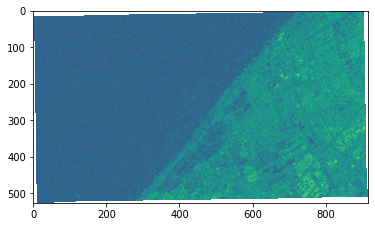

In [4]:
plt.imshow(images[0][:, :, 1])

## Vegetation Index from Sentinel 2

We want to get the vegetation index for the same bounding box but using a different satellite and different bands. The vegetation index is derived from bands B8, B4 and B3

In [7]:
dataset = "COPERNICUS/S2_SR"
bands = ["B8", "B4", "B3"]
tasks = earth_engine_to_google_drive(
    point=point,
    bounding_box=bbox,
    start_date="2020-04-15",
    end_date="2020-05-25",
    dataset=dataset,
    bands=bands,
    n_images=10,
    drive_folder="Coastal-Vegetation",
    task_name="b8-b4-b3"
)

In [8]:
[task.active() for task in tasks]

[True, True, True, True, True, True, True, True, True, True]

Then it's just a question of importing the data in the `data/` folder and extracting it as above

In [5]:
base_path = "data/Coastal-Vegetation/"
paths = [os.path.join(base_path, path) for path in os.listdir(base_path)]
images = get_image_collection(paths, collate=False)
[image.shape for image in images]

[(526, 916, 3),
 (526, 916, 3),
 (522, 621, 3),
 (521, 555, 3),
 (526, 916, 3),
 (521, 582, 3),
 (526, 916, 3),
 (526, 916, 3),
 (526, 916, 3),
 (526, 916, 3)]

To visualise images, we should scale them into the \[0, 1\] range

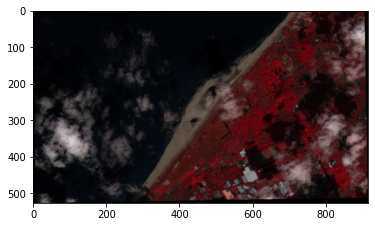

In [12]:
test_image = minmax_scaling(images[1])
plt.imshow(test_image)